# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [51]:
#1
"""
Your code here
"""
cut_rule = [0, 1, 2, 5, np.inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=False)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(0.0, 1.0]    61119
(1.0, 2.0]    26749
(2.0, 5.0]     4230
(5.0, inf]       42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [66]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()
grouped_df.describe()

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                  
(0.0, 1.0]         0       55665.0  175008.249905  1.024801e+05  27000.0   
                   1        5454.0  182361.980198  1.584767e+06  33750.0   
(1.0, 2.0]         0       24416.0  173638.366582  1.531081e+05  26550.0   
                   1        2333.0  161512.254393  8.793137e+04  27900.0   
(2.0, 5.0]         0        3810.0  175053.742913  1.128427e+05  29250.0   
                   1         420.0  160677.385714  1.130315e+05  36000.0   
(5.0, inf]         0          33.0  139159.090909  7.112483e+04  45000.0   
                   1           9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
(0.0, 1.0]         0       112500.0  157500.0  211500.0    3950059.5  
                   1       112500.0  135000.0  202500.0  117000000.0  
(1.0, 2.0]         0       112500.0  157500.0  202500.0   18000090.0  
                   1       112500.0  135000.0  202500.0    1350000.0  
(2.0, 5.0]         0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
(5.0, inf]         0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

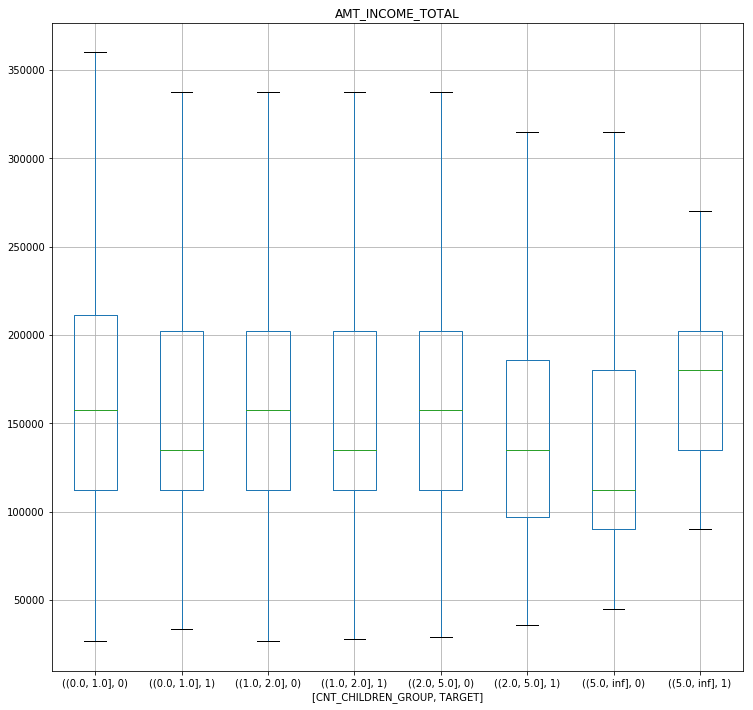

In [59]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [65]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - np.mean(x)) / np.std(x))
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head(100)

CNT_CHILDREN_GROUP  TARGET
(0.0, 1.0]          0         1.024801e+05
                    1         1.584767e+06
(1.0, 2.0]          0         1.531081e+05
                    1         8.793137e+04
(2.0, 5.0]          0         1.128427e+05
                    1         1.130315e+05
(5.0, inf]          0         7.112483e+04
                    1         7.377118e+04
Name: AMT_INCOME_TOTAL, dtype: float64


,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.000,NaN
1,270000.000,NaN
2,67500.000,NaN
3,135000.000,NaN
4,121500.000,NaN
5,99000.000,NaN
6,171000.000,-0.039113
7,360000.000,NaN
8,112500.000,NaN
9,135000.000,NaN
